# Importing Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the 'database' module for database operations
import database as db

# Importing the 'Mymodule' module for custom functionality
import Mymodule

# Importing the 'warnings' module and suppressing warning messages
import warnings
warnings.filterwarnings('ignore')

# Extract, Transform & Load

In [2]:
folder_path = r'C:\Users\neera\OneDrive\Documents\All Projects\MySql\music store data\Dataset/'

file_list = os.listdir(folder_path)
csv_files = [file for file in file_list if file.endswith('.csv')]
db.create_database('Music_database')
table_name = []

# Loop through CSV files
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read CSV file into a DataFrame
    df = pd.read_csv(file_path)
    df.dropna(axis=0, inplace=True)
    df = df.drop_duplicates()
    t_name = csv_file[:-4]
    table_name.append(t_name)
    result = db.dataframe_to_database(df, table_name=t_name, database='Music_database')
    print(f"{t_name} (rows:{df.shape[0]}) {result}")
    print('======================================')
    
print(f"Total {len(csv_files)} Tables")

Database 'Music_database' dropped successfully.
album (rows:332) Data inserted successfully.
artist (rows:275) Data inserted successfully.
customer (rows:9) Data inserted successfully.
employee (rows:8) Data inserted successfully.
genre (rows:25) Data inserted successfully.
invoice (rows:297) Data inserted successfully.
invoice_line (rows:4757) Data inserted successfully.
media_type (rows:5) Data inserted successfully.
playlist (rows:18) Data inserted successfully.
playlist_track (rows:8715) Data inserted successfully.
track (rows:2525) Data inserted successfully.
Total 11 Tables


**Database Connection**

In [3]:
import mysql.connector as mcn
conn = mcn.connect(host='localhost', user='root', password='Neeraj@123',database='Music_database')
cursor = conn.cursor()

In [4]:
print(table_name)  # table name

['album', 'artist', 'customer', 'employee', 'genre', 'invoice', 'invoice_line', 'media_type', 'playlist', 'playlist_track', 'track']


# Data Exploration

In [5]:
album = db.read_query('''select * from album''', conn)
album.head()

,album_id,artist_id,title
0,156,50,And Justice For All
1,208,136,Black Light Syndrome
2,257,179,20th Century Masters - The Millennium Collecti...
3,296,230,"A Copland Celebration, Vol. I"
4,94,90,A Matter of Life and Death


In [6]:
artist = db.read_query("""select * from artist""", conn)
artist.head()

,artist_id,name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [7]:
customer = db.read_query("""select * from customer""", conn)
customer.head()

,customer_id,support_rep_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email
0,1,3,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,10,4,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br
2,11,5,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br
3,12,3,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br
4,14,5,Mark,Philips,Telus,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,+1 (780) 434-4554,+1 (780) 434-5565,mphilips12@shaw.ca


In [8]:
employee = db.read_query("""select * from employee""", conn)
employee.head()

,employee_id,reports_to,last_name,first_name,title,levels,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
0,1,9.0,Adams,Andrew,General Manager,L6,18-02-1962 00:00,14-08-2016 00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,1.0,Edwards,Nancy,Sales Manager,L4,08-12-1958 00:00,01-05-2016 00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,2.0,Peacock,Jane,Sales Support Agent,L1,29-08-1973 00:00,01-04-2017 00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,2.0,Park,Margaret,Sales Support Agent,L1,19-09-1947 00:00,03-05-2017 00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,2.0,Johnson,Steve,Sales Support Agent,L1,03-03-1965 00:00,17-10-2017 00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [9]:
genre = db.read_query("""select * from genre""", conn)
genre.head()

,genre_id,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [10]:
invoice = db.read_query("""select * from invoice""", conn)
invoice.head()

,invoice_id,customer_id,total,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code
0,1,18,15.84,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612
1,2,30,9.90,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7
2,4,18,7.92,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612
3,5,27,16.83,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719
4,6,31,1.98,2017-01-10 00:00:00,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5


In [11]:
invoice_line = db.read_query("""select * from invoice_line""", conn)
invoice_line.head()

,invoice_line_id,invoice_id,track_id,quantity,unit_price
0,1,1,1158,1,0.99
1,2,1,1159,1,0.99
2,3,1,1160,1,0.99
3,4,1,1161,1,0.99
4,5,1,1162,1,0.99


In [12]:
media_type = db.read_query("""select * from media_type""", conn)
media_type.head()

,media_type_id,name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [13]:
playlist = db.read_query("""select * from playlist""", conn)
playlist.head()

,playlist_id,name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music


In [14]:
playlist_track = db.read_query("""select * from playlist_track""", conn)
playlist_track.head()

,playlist_id,track_id
0,1,3402
1,1,3389
2,1,3390
3,1,3391
4,1,3392


In [15]:
track = db.read_query("""select * from track""", conn)
track.head()

,track_id,album_id,media_type_id,genre_id,milliseconds,bytes,unit_price,name,composer
0,1,1,1,1,343719,11170334,0.99,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson"
1,3,3,2,1,230619,3990994,0.99,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho..."
2,4,3,2,1,252051,4331779,0.99,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D..."
3,5,3,2,1,375418,6290521,0.99,Princess of the Dawn,Deaffy & R.A. Smith-Diesel
4,6,1,1,1,205662,6713451,0.99,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson"


# Explore DataSet Information

In [16]:
for table in table_name:
    df = db.read_query(f"""select * from {table}""", conn)
    Mymodule.design_text(f"Table Name: {table} and Shape: {df.shape}")
    print(df.info())
    print('\n================ End ===================')

+---------------------------------------+
| Table Name: album and Shape: (332, 3) |
+---------------------------------------+
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   album_id   332 non-null    int64 
 1   artist_id  332 non-null    int64 
 2   title      332 non-null    object
dtypes: int64(2), object(1)
memory usage: 7.9+ KB
None

================ End ===================
+----------------------------------------+
| Table Name: artist and Shape: (275, 2) |
+----------------------------------------+
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist_id  275 non-null    int64 
 1   name       275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB
None

================ End ============

# Pairplot

+---------------------------------------+
| Table Name: album and Shape: (332, 3) |
+---------------------------------------+


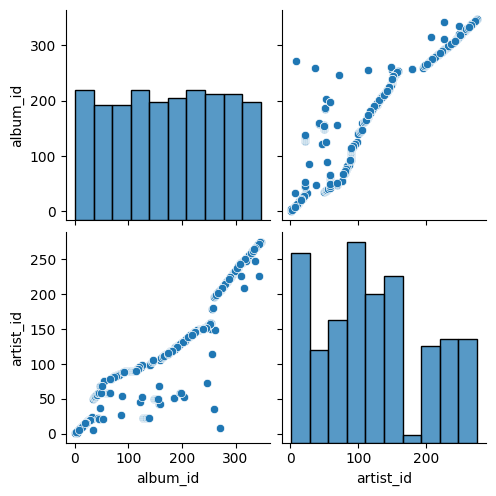


+----------------------------------------+
| Table Name: artist and Shape: (275, 2) |
+----------------------------------------+


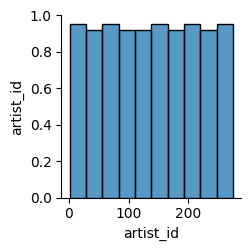


+-----------------------------------------+
| Table Name: customer and Shape: (9, 13) |
+-----------------------------------------+


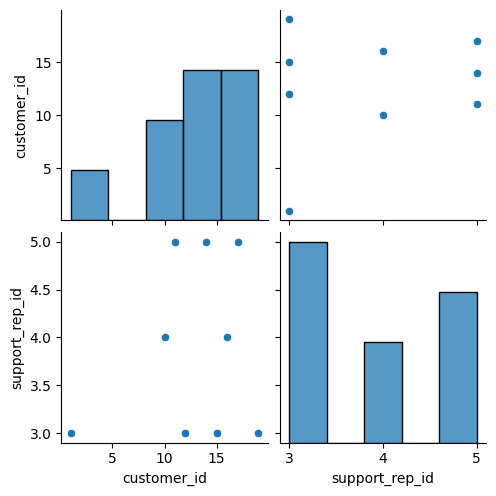


+-----------------------------------------+
| Table Name: employee and Shape: (8, 16) |
+-----------------------------------------+


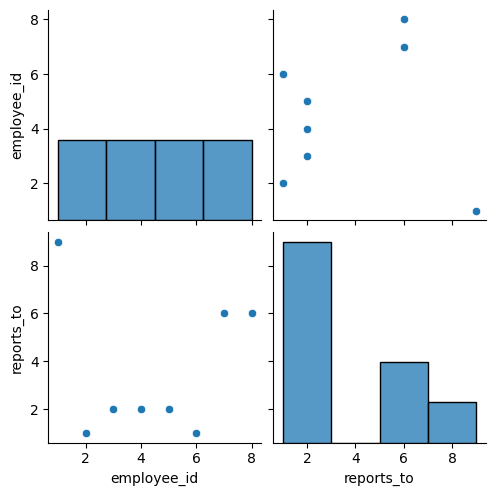


+--------------------------------------+
| Table Name: genre and Shape: (25, 2) |
+--------------------------------------+


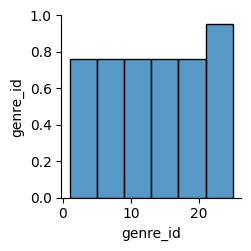


+-----------------------------------------+
| Table Name: invoice and Shape: (297, 9) |
+-----------------------------------------+


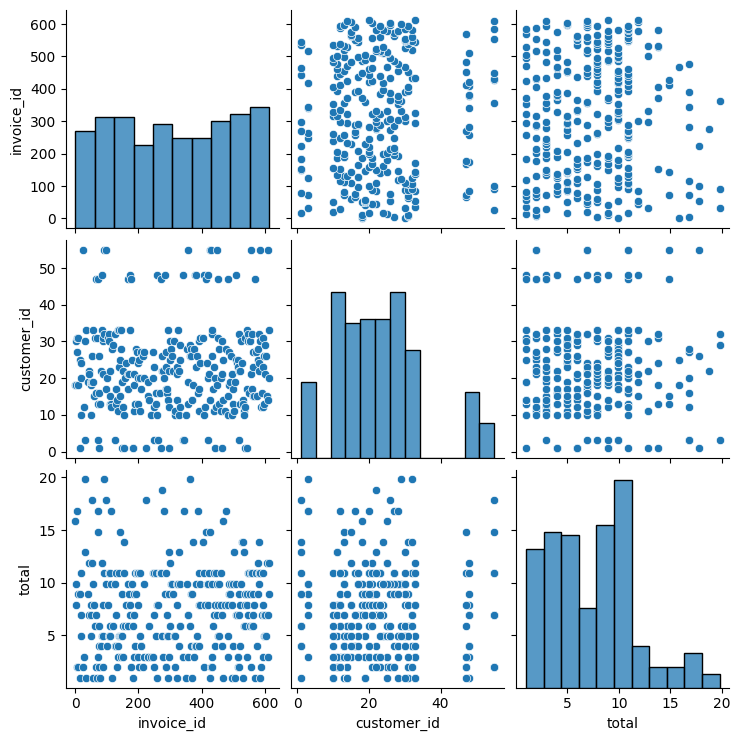


+-----------------------------------------------+
| Table Name: invoice_line and Shape: (4757, 5) |
+-----------------------------------------------+


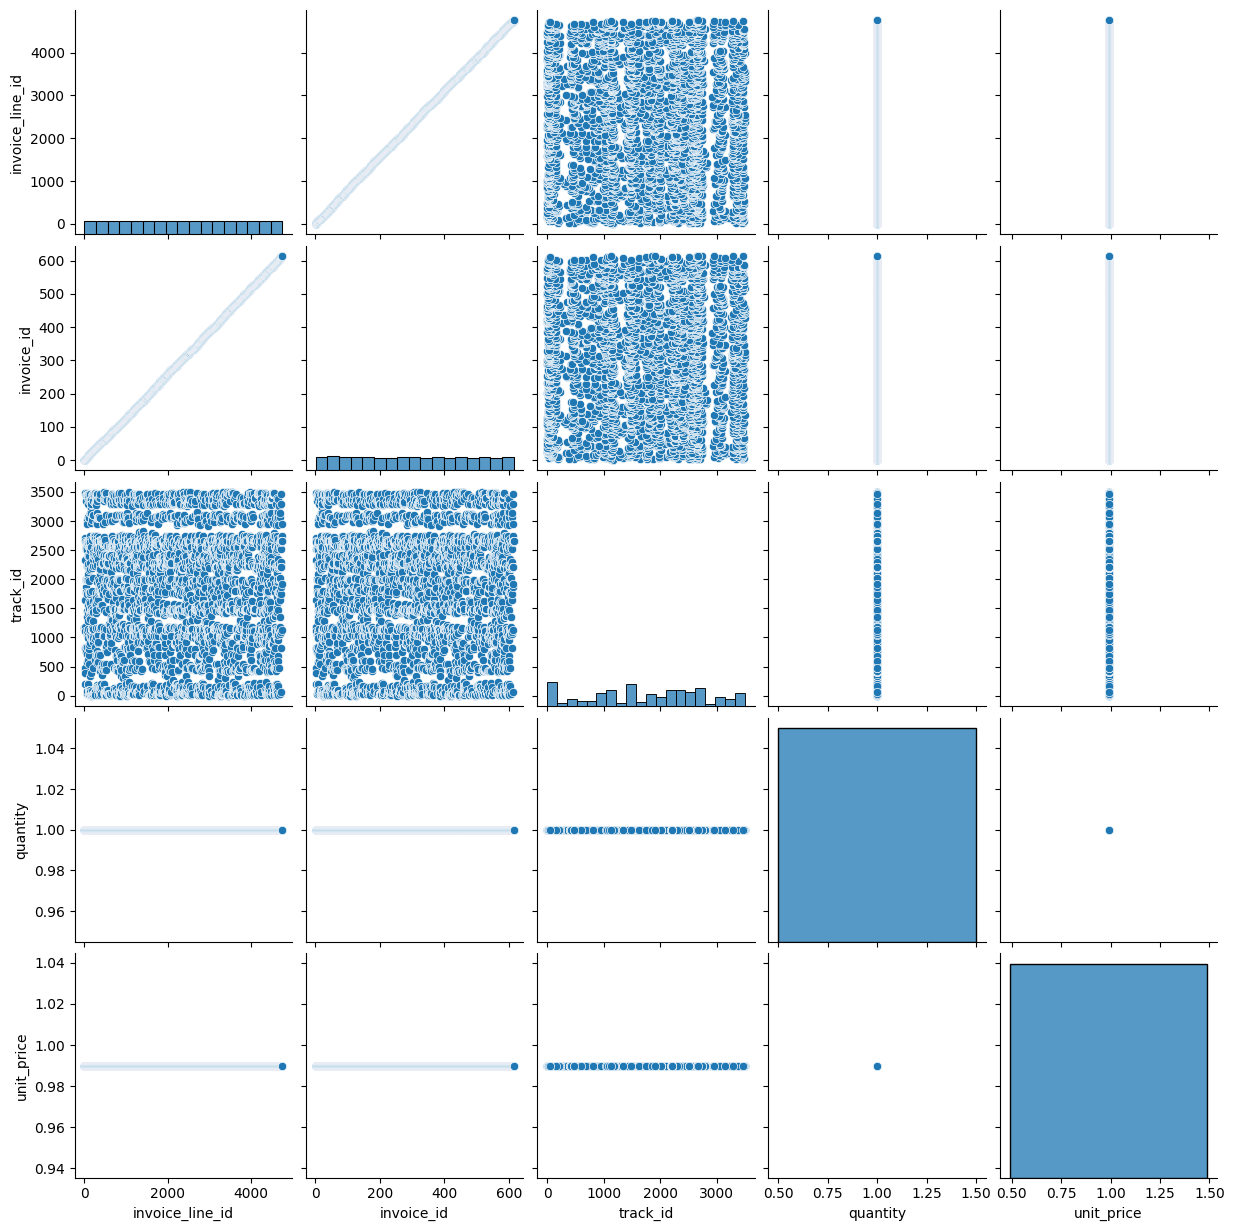


+------------------------------------------+
| Table Name: media_type and Shape: (5, 2) |
+------------------------------------------+


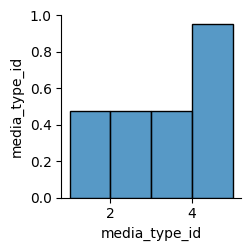


+-----------------------------------------+
| Table Name: playlist and Shape: (18, 2) |
+-----------------------------------------+


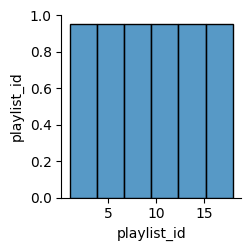


+-------------------------------------------------+
| Table Name: playlist_track and Shape: (8715, 2) |
+-------------------------------------------------+


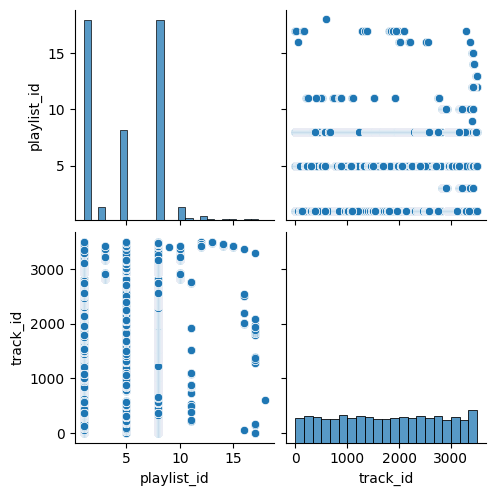


+----------------------------------------+
| Table Name: track and Shape: (2525, 9) |
+----------------------------------------+


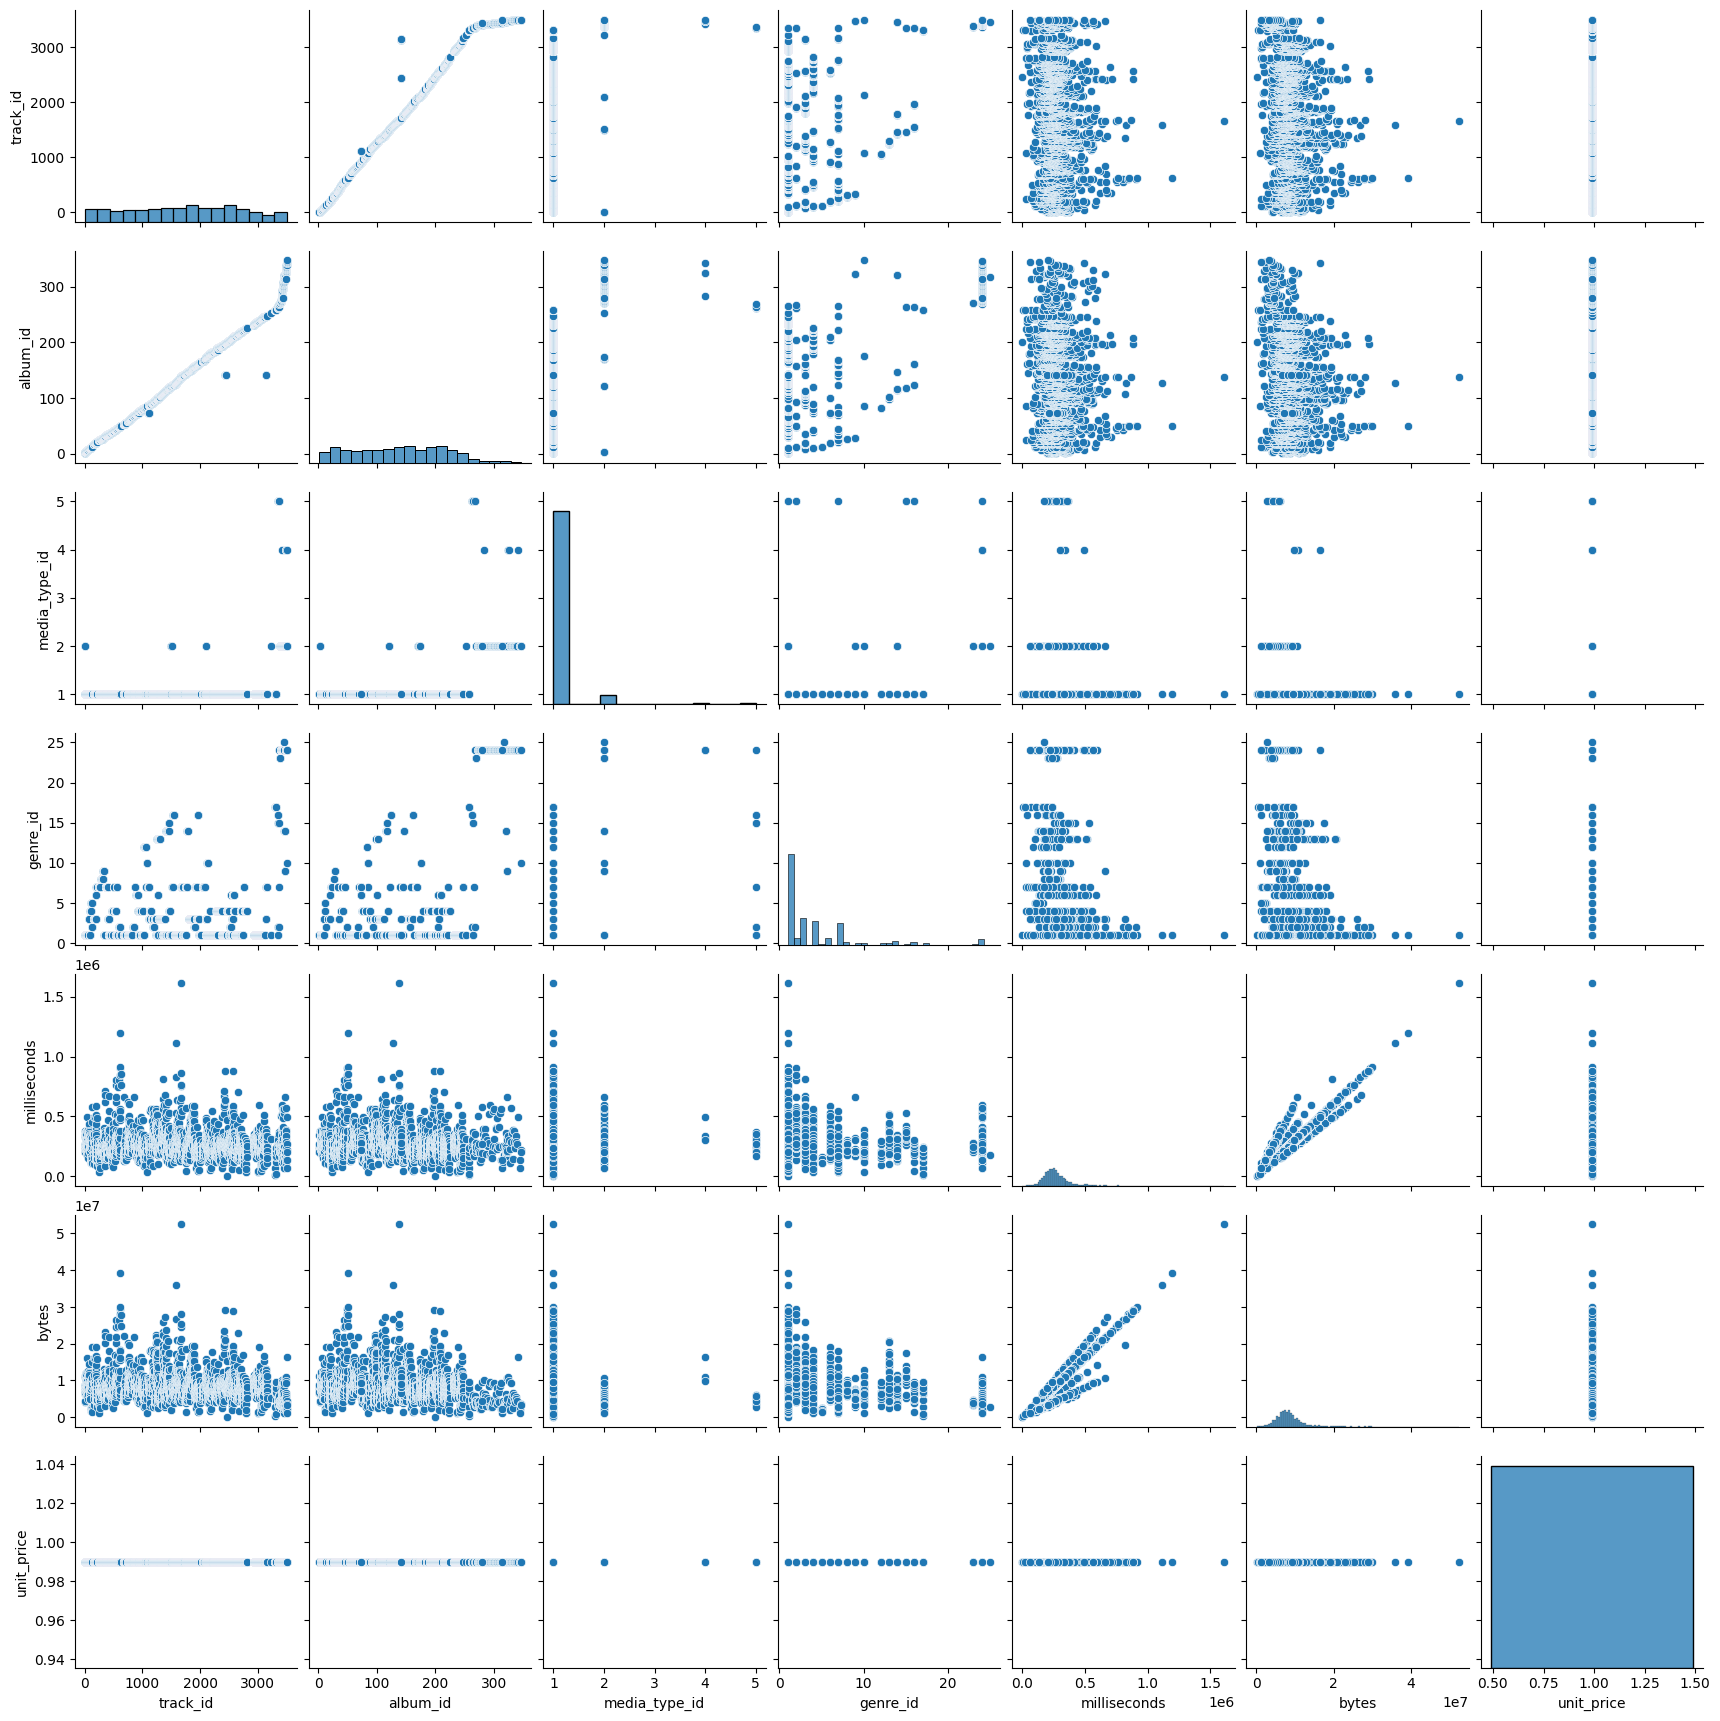

In [17]:
for table in table_name:
    df = db.read_query(f"""select * from {table}""", conn)
    Mymodule.design_text(f"Table Name: {table} and Shape: {df.shape}")
    sns.pairplot(df)
    plt.show()
    print()

# Describe dataset

In [18]:
for table in table_name:
    df = pd.read_sql_query(f"""select * from {table}""", conn)
    Mymodule.design_text(f"Table Name: {table} and Shape: {df.shape}")
    
    print(df.describe())
    
    check_object = len(df.select_dtypes('object').columns)
    if check_object > 0: 
        print()
        print(df.describe(include='object'))  
        
    print()
    print('_________________________________________________________________')

+---------------------------------------+
| Table Name: album and Shape: (332, 3) |
+---------------------------------------+
         album_id   artist_id
count  332.000000  332.000000
mean   174.653614  121.945783
std     99.967112   77.554133
min      1.000000    1.000000
25%     90.750000   58.000000
50%    175.500000  113.000000
75%    260.250000  179.250000
max    347.000000  275.000000

                      title
count                   332
unique                  332
top     And Justice For All
freq                      1

_________________________________________________________________
+----------------------------------------+
| Table Name: artist and Shape: (275, 2) |
+----------------------------------------+
        artist_id
count  275.000000
mean   138.000000
std     79.529869
min      1.000000
25%     69.500000
50%    138.000000
75%    206.500000
max    275.000000

         name
count     275
unique    275
top     AC/DC
freq        1

_________________________________

+----------------------------------------+
| Table Name: track and Shape: (2525, 9) |
+----------------------------------------+
          track_id     album_id  media_type_id     genre_id  milliseconds  \
count  2525.000000  2525.000000    2525.000000  2525.000000  2.525000e+03   
mean   1711.427327   138.245149       1.063762     4.318812  2.704703e+05   
std     956.051743    77.969749       0.348607     5.094447  1.126373e+05   
min       1.000000     1.000000       1.000000     1.000000  1.071000e+03   
25%     921.000000    73.000000       1.000000     1.000000  2.050870e+05   
50%    1753.000000   141.000000       1.000000     3.000000  2.520550e+05   
75%    2490.000000   201.000000       1.000000     6.000000  3.102300e+05   
max    3503.000000   347.000000       5.000000    25.000000  1.612329e+06   

              bytes    unit_price  
count  2.525000e+03  2.525000e+03  
mean   8.571472e+06  9.900000e-01  
std    3.858379e+06  3.264702e-14  
min    3.874700e+04  9.900000e-01

# Analysis and Visulization

**Q1. Who is the senior most employee based on job title?**

In [19]:
db.read_query("""select * from employee
                     order by levels desc
                     limit 1""", conn)

,employee_id,reports_to,last_name,first_name,title,levels,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
0,1,9.0,Adams,Andrew,General Manager,L6,18-02-1962 00:00,14-08-2016 00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com


**Q2. Which countries have the most Invoices?**

In [20]:
countries = db.read_query("""select billing_country, count(*) as counts from invoice
                     group by billing_country
                     order by counts desc""", conn)
Mymodule.formating_DataFrame(countries, title='Most Invoices Country')

    Most Invoices Country
+--------------------------+
| billing_country | counts |
+--------------------------+
| USA             | 131    | 
| Canada          | 76     | 
| Brazil          | 61     | 
| Australia       | 10     | 
| Netherlands     | 10     | 
| Italy           | 9      | 
+--------------------------+


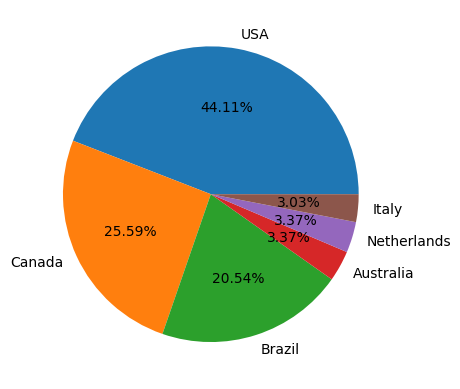

In [21]:
mylabel = countries['billing_country'].values
plt.pie(countries['counts'].values, labels = mylabel, autopct='%.2f%%')
plt.show()

**Q3. What are top 3 values of total invoice?**

In [22]:
total_invoice = db.read_query("""select total from invoice 
                     group by total 
                     order by total desc 
                     limit 3""", conn)
Mymodule.formating_DataFrame(total_invoice, title='Top 3 total')

Top 3 total
+-------+
| total |
+-------+
| 19.8  | 
| 18.81 | 
| 17.82 | 
+-------+


**Q4. Which city has the best customers? We would like to throw a promotional Music Festival in the city we made the most money. Write a query that returns one city that has the highest sum of invoice totals. Returns both the city name & sum of all invoice totals.**

In [23]:
city_total = db.read_query("""select billing_city as City, round(sum(total),2) AS Total from invoice
                     group by billing_city
                     order by billing_city desc""", conn)
Mymodule.formating_DataFrame(city_total, title='city has the best customers')

       city has the best customers
+----------------------------------------+
| City                | round(sum(total) |
+----------------------------------------+
| Yellowknife         | 75.24            | 
| Winnipeg            | 70.29            | 
| Vancouver           | 66.33            | 
| Tucson              | 84.15            | 
| Toronto             | 40.59            | 
| Sidney              | 81.18            | 
| São Paulo           | 129.69           | 
| São José dos Campos | 108.9            | 
| Salt Lake City      | 72.27            | 
| Rome                | 50.49            | 
| Rio de Janeiro      | 82.17            | 
| Reno                | 91.08            | 
| Redmond             | 98.01            | 
| Ottawa              | 91.08            | 
| Orlando             | 92.07            | 
| New York            | 79.2             | 
| Mountain View       | 169.29           | 
| Montréal            | 99.99            | 
| Madison             | 76.23            | 


**Q5. Who is the best customer? The customer who has spent the most money will be decaled the best customer. Write a query that returns the who has spent the most money?**

In [24]:
best_customer = db.read_query("""select c.first_name as Customer, round(sum(i.total),2) as total
                                     from customer c
                                     inner join invoice i
                                     on c.customer_id=i.customer_id
                                     group by c.first_name
                                     order by total desc
                                     limit 1""", conn)
Mymodule.formating_DataFrame(best_customer, title='best customer')

    best customer
+------------------+
| Customer | total |
+------------------+
| Luís     | 108.9 | 
+------------------+


**Q6. Write query to return the eamil, firstname, lastname & Genre of all Rock Music listners. Returns your list ordered alphabetically by email starting with A**

In [25]:
music_listner = db.read_query("""select distinct(email) as email, first_name, last_name
                                     from customer c
                                     inner join invoice i on c.customer_id=i.customer_id
                                     inner join invoice_line il on i.invoice_id=il.invoice_id
                                     where il.track_id in (
                                         select track_id from track t
                                         join genre g on t.genre_id = g.genre_id
                                         where g.name like 'Rock'
                                     )
                                     order by email""", conn)
Mymodule.formating_DataFrame(music_listner, title='Music Listners')

                      Music Listners
+--------------------------------------------------------+
| email                         | first_name | last_name |
+--------------------------------------------------------+
| alero@uol.com.br              | Alexandre  | Rocha     | 
| eduardo@woodstock.com.br      | Eduardo    | Martins   | 
| fharris@google.com            | Frank      | Harris    | 
| jacksmith@microsoft.com       | Jack       | Smith     | 
| jenniferp@rogers.ca           | Jennifer   | Peterson  | 
| luisg@embraer.com.br          | Luís       | Gonçalves | 
| mphilips12@shaw.ca            | Mark       | Philips   | 
| roberto.almeida@riotur.gov.br | Roberto    | Almeida   | 
| tgoyer@apple.com              | Tim        | Goyer     | 
+--------------------------------------------------------+


**Q7. Let's invite the artist who have written the most rock music in our dataset. Write a query that returns the Artist name and total track count of the top 10 rock brands.**

                        Artist-Details
+------------------------------------------------------------+
| artist_id | name                         | number_of_songs |
+------------------------------------------------------------+
| 22        | Led Zeppelin                 | 114             | 
| 150       | U2                           | 112             | 
| 58        | Deep Purple                  | 92              | 
| 118       | Pearl Jam                    | 54              | 
| 152       | Van Halen                    | 52              | 
| 90        | Iron Maiden                  | 51              | 
| 51        | Queen                        | 45              | 
| 142       | The Rolling Stones           | 41              | 
| 76        | Creedence Clearwater Revival | 40              | 
| 52        | Kiss                         | 35              | 
+------------------------------------------------------------+


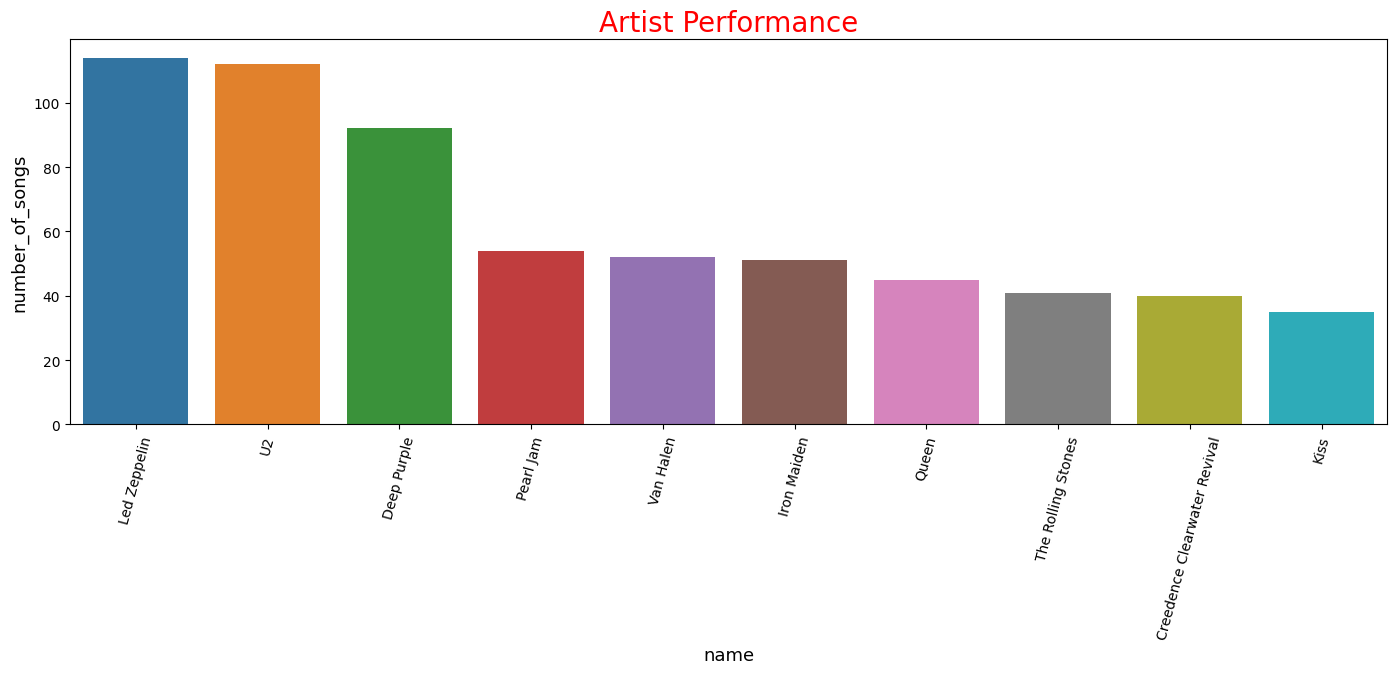

In [26]:
# SET sql_mode=(SELECT REPLACE(@@sql_mode,'ONLY_FULL_GROUP_BY',''));
query = """SELECT artist.artist_id, artist.name, COUNT(artist.artist_id) AS number_of_songs
           FROM track
           JOIN album ON album.album_id = track.album_id
           JOIN artist ON artist.artist_id = album.artist_id
           JOIN genre ON genre.genre_id = track.genre_id
           WHERE genre.name LIKE 'Rock'
           GROUP BY artist.artist_id, artist.name
           ORDER BY number_of_songs DESC
           LIMIT 10"""
df = db.read_query(query, conn)
Mymodule.formating_DataFrame(df, title='Artist-Details')
plt.figure(figsize=(17,5))
sns.barplot(x='name', y='number_of_songs', data=df)
plt.xticks(rotation=75)
plt.title('Artist Performance', fontsize=20, color='red')
plt.xlabel('name', fontsize=13)
plt.ylabel('number_of_songs', fontsize=13)
plt.show()

**Q8. Return all the track names that have a song length longer than the averge song length. Return the name and milliseconds for each track. order by the song length with the longest songs listed first.**

In [27]:
query = """
    SELECT name, milliseconds
    FROM track
    WHERE milliseconds > (
        SELECT AVG(milliseconds) AS avg_track_length
        FROM track
    )
    ORDER BY milliseconds DESC
"""
track_name = db.read_query(query, conn)
track_name.head()

,name,milliseconds
0,Dazed And Confused,1612329
1,Space Truckin',1196094
2,Dazed And Confused,1116734
3,Going Down / Highway Star,913658
4,My Funny Valentine (Live),907520


**Q9. Find how much amount spent by each customer on artist? Write a query to return customer name, artist name and total spent.**

In [28]:
query = """
WITH best_selling_artist AS (
    SELECT
        artist.artist_id AS artist_id,
        artist.name AS artist_name,
        SUM(invoice_line.unit_price * invoice_line.quantity) AS total_sales
    FROM
        invoice_line
        JOIN track ON track.track_id = invoice_line.track_id
        JOIN album ON album.album_id = track.album_id
        JOIN artist ON artist.artist_id = album.artist_id
    GROUP BY artist.artist_id, artist.name
    ORDER BY total_sales DESC
    LIMIT 1
)
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    bsa.artist_name,
    SUM(il.unit_price * il.quantity) AS amount_spend
FROM
    invoice i
    JOIN customer c ON c.customer_id = i.customer_id
    JOIN invoice_line il ON il.invoice_id = i.invoice_id
    JOIN track t ON t.track_id = il.track_id
    JOIN album alb ON alb.album_id = t.album_id
    JOIN best_selling_artist bsa ON bsa.artist_id = alb.artist_id
GROUP BY c.customer_id, c.first_name, c.last_name, bsa.artist_name
ORDER BY amount_spend DESC
"""
column_name = ['customer_id','first_name','last_name','artist_name','amount_spend']
db.read_query(query, conn, headers=column_name)

,customer_id,first_name,last_name,artist_name,amount_spend
0,17,Jack,Smith,Queen,1.98
1,16,Frank,Harris,Queen,1.98
2,11,Alexandre,Rocha,Queen,1.98
3,1,Luís,Gonçalves,Queen,1.98
4,15,Jennifer,Peterson,Queen,1.98
5,19,Tim,Goyer,Queen,0.99


**Q10. We want to find out the most popular music Genre for each country. We determine the most popular genre as the genre with the highest amount of purches. Write a query that returns each country along with the top Genre. For countries where the maximum number of purchases is shared return all Genre.**

In [29]:
query = """
WITH popular_genre AS
(
    SELECT COUNT(invoice_line.quantity) AS purchases, customer.country, genre.name, genre.genre_id,
    ROW_NUMBER() OVER(PARTITION BY customer.country ORDER BY COUNT(invoice_line.quantity) DESC) AS RowNo
    FROM invoice_line
    JOIN invoice ON invoice.invoice_id = invoice_line.invoice_id
    JOIN customer ON customer.customer_id = invoice.customer_id
    JOIN track ON track.track_id = invoice_line.track_id
    JOIN genre ON genre.genre_id = track.genre_id
    GROUP BY 2,3,4
    ORDER BY 2 ASC, 1 DESC
)
SELECT * FROM popular_genre WHERE RowNo <= 1
"""
column_name = ['purchases', 'country','name', 'genre_id','RowNo']
db.read_query(query, conn, headers=column_name)

,purchases,country,name,genre_id,RowNo
0,117,Brazil,Rock,1,1
1,63,Canada,Rock,1,1
2,112,USA,Rock,1,1


**Q11. Write a query that determines the customer that has spent the most on music for each country. Write a query that returns the country along with the top customer and how much they spent. For countries where the top amount spent is shared, provide all customers who spent this amount.**

In [30]:
query = """
WITH Customer_with_country AS (
    SELECT customer.customer_id, first_name, last_name, billing_country, SUM(total) AS total_spending,
    ROW_NUMBER() OVER(PARTITION BY billing_country ORDER BY SUM(total) DESC) AS RowNo
    FROM invoice
    JOIN customer ON customer.customer_id = invoice.customer_id
    GROUP BY 1,2,3,4
    ORDER BY 4 ASC, 5 DESC
)
SELECT * FROM Customer_with_country WHERE RowNo <= 1
"""
column_name = ['customer_id', 'first_name','last_name','billing_country','total_spending','RowNo']
db.read_query(query, conn, headers=column_name)

,customer_id,first_name,last_name,billing_country,total_spending,RowNo
0,1,Luís,Gonçalves,Brazil,108.899999,1
1,15,Jennifer,Peterson,Canada,66.330001,1
2,17,Jack,Smith,USA,98.010000,1


In [31]:
# Close the connection
conn.close()